In [1]:
from dataset.bbox_dataset import GraspNetDataset, load_valid_obj_idxs

import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
root = './dataset'
limited_data = False
overfitting = False
valid_obj_idxs = load_valid_obj_idxs()
train_dataset = GraspNetDataset(root, valid_obj_idxs, camera='realsense', split='train',
                                limited_data=limited_data, overfitting=overfitting)

In [8]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933],
          [0.635, 0.078, 0.184], [0.000, 0.502, 0.502], [0.502, 0.000, 0.502],
          [0.502, 0.502, 0.000], [0.000, 0.000, 0.502], [0.502, 0.000, 0.000],
          [0.000, 0.502, 0.000], [0.502, 0.502, 0.502], [1.000, 0.000, 0.000],
          [0.000, 1.000, 0.000], [0.000, 0.000, 1.000], [1.000, 1.000, 0.000],
          [1.000, 0.000, 1.000], [0.000, 1.000, 1.000], [0.000, 0.000, 0.000],
          [1.000, 1.000, 1.000]]

In [9]:
def plot_gt(img, idxs, boxes):
    plt.figure(figsize=(10,8))
    plt.imshow(img, cmap='gray')
    ax = plt.gca()
    colors = COLORS * 100
    for cl, (xmin, ymin, xmax, ymax), c in zip(idxs, boxes.tolist(), colors):
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=3))
        
        text = f'id={cl}'
        ax.text(xmin, ymin, text, fontsize=15,
                bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [17]:
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [24]:
def scale_bbox(bbox, h, w):
    bbox = bbox * np.array([w, h, w, h])[None]
    return bbox

In [7]:
print(f'train_dataset.len = {len(train_dataset)}')
print(f'valid object indices: {valid_obj_idxs}')
for k, v in train_dataset[10].items():
    print(k, v.shape)
    if 'obj_' in k:
        print(v)

train_dataset.len = 25600
valid object indices: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
color (3, 720, 1280)
depth (720, 1280)
objectness_label (720, 1280)
obj_bounding_boxes (9, 4)
[[0.5570313  0.5472222  0.6460937  0.70416665]
 [0.5140625  0.         0.89375    0.58055556]
 [0.3        0.41111112 0.55390626 0.6652778 ]
 [0.43515626 0.2777778  0.5703125  0.47916666]
 [0.39296874 0.50972223 0.57109374 0.82222223]
 [0.428125   0.76666665 0.55078125 0.99027777]
 [0.35390624 0.         0.4765625  0.47916666]
 [0.35625    0.6375     0.503125   0.8347222 ]
 [0.5445312  0.6638889  0.809375   1.        ]]
camera_intrinsics (10, 1)
camera_extrinsics (4, 4)
obj_idxs (9,)
[15  1  6 16 21 49 67 71 47]


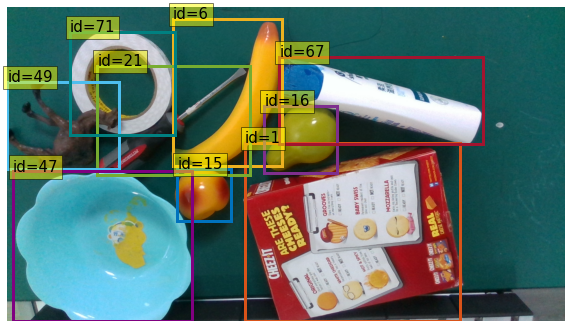

In [26]:
data_eg = train_dataset[0]
img = data_eg['color'].transpose((1, 2, 0))
idxs = data_eg['obj_idxs']
boxes = scale_bbox(data_eg['obj_bounding_boxes'], 720, 1280)
plot_gt(img, idxs, boxes)

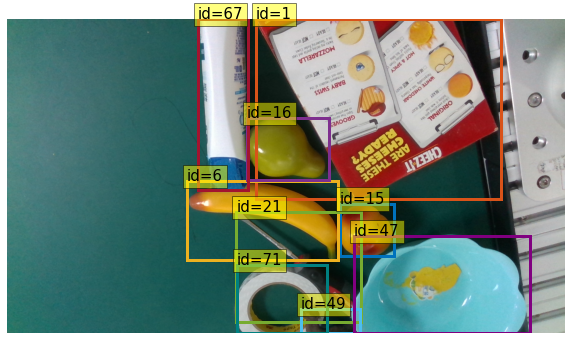

In [27]:
data_eg = train_dataset[1]
img = data_eg['color'].transpose((1, 2, 0))
idxs = data_eg['obj_idxs']
boxes = scale_bbox(data_eg['obj_bounding_boxes'], 720, 1280)
plot_gt(img, idxs, boxes)

In [30]:
np.unique(data_eg['objectness_label'])

array([ 0,  1,  6, 15, 16, 21, 47, 49, 67, 71], dtype=int32)

In [31]:
data_eg.keys()

dict_keys(['color', 'depth', 'objectness_label', 'obj_bounding_boxes', 'camera_intrinsics', 'camera_extrinsics', 'obj_idxs'])

In [35]:
train_dataset[0]['camera_extrinsics']

array([[ 0.99925417,  0.03416702, -0.01799314, -0.06077266],
       [ 0.02872165, -0.9690726 , -0.24509867, -0.04276323],
       [-0.02581095,  0.24439906, -0.96933115,  0.4776516 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [36]:
train_dataset[1]['camera_extrinsics']

array([[-2.2187468e-01, -9.2723751e-01, -3.0166578e-01,  5.4641396e-02],
       [-9.7507489e-01,  2.1075730e-01,  6.9356114e-02, -1.6520734e-01],
       [-7.3132000e-04,  3.0953509e-01, -9.5088774e-01,  4.5770016e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],
      dtype=float32)

In [37]:
train_dataset.h5_file.keys()

<KeysViewHDF5 ['collision_labels', 'colorpath', 'depthpath', 'frameid', 'labelpath', 'metapath', 'scenename', 'visible_mask_path']>

In [39]:
train_dataset.h5_file['metapath'][0]

b'/home/mihai_anca/graspnet/graspnet/scenes/scene_0000/realsense/meta/0000.mat'

In [43]:
import h5py

In [46]:
train_dataset.grasp_labels_file = h5py.File(train_dataset.grasp_labels_filename, 'r')

In [49]:
len(train_dataset.grasp_labels_file['grasp_labels'])

87

In [50]:
train_dataset.grasp_labels_file['grasp_labels'].keys()

<KeysViewHDF5 ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '9']>

In [52]:
grasp_labels = train_dataset.grasp_labels_file['grasp_labels']['10']

In [53]:
points, offsets, scores, tolerance = grasp_labels['points'][()], grasp_labels['offsets'][()], grasp_labels['scores'][()], grasp_labels['tolerance'][()]

In [54]:
points.shape

(2410, 3)

In [55]:
tolerance.shape

(2410, 300, 12, 4)

In [56]:
scores.shape

(2410, 300, 12, 4)

In [60]:
# 300, 12, 4 denote view id, in-plane rotation id and depth id respectively
offsets.shape

(2410, 300, 12, 4, 3)

In [62]:
# ‘offsets’ records the in-plane rotation, depth and width of the gripper respectively in the last dimension
offsets[0, 0, 0]

array([[0.        , 0.01      , 0.08061388],
       [0.        , 0.02      , 0.08061388],
       [0.        , 0.03      , 0.08061388],
       [0.        , 0.04      , 0.08061388]], dtype=float32)

In [65]:
offsets[0, 0, 11]

array([[2.8797932, 0.01     , 0.       ],
       [2.8797932, 0.02     , 0.       ],
       [2.8797932, 0.03     , 0.       ],
       [2.8797932, 0.04     , 0.       ]], dtype=float32)

In [69]:
offsets[0, 0, 1, :, 0]

array([0.2617994, 0.2617994, 0.2617994, 0.2617994], dtype=float32)

In [82]:
scores[0, 50]

array([[-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1., -1.]], dtype=float32)

In [84]:
train_dataset.h5_file.keys()

<KeysViewHDF5 ['collision_labels', 'colorpath', 'depthpath', 'frameid', 'labelpath', 'metapath', 'scenename', 'visible_mask_path']>

In [87]:
train_dataset.grasp_labels_file['grasp_labels']['1'].keys()

<KeysViewHDF5 ['offsets', 'points', 'scores', 'tolerance']>

In [88]:
tolerance.shape

(2410, 300, 12, 4)

In [90]:
np.unique(tolerance)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016],
      dtype=float32)

In [96]:
scores.shape

(2410, 300, 12, 4)

In [97]:
for i, s in enumerate(scores):
    if s.max() < 0:
        print(i, s.max())

7 -1.0
12 -1.0
35 -1.0
44 -1.0
60 -1.0
63 -1.0
79 -1.0
83 -1.0
109 -1.0
121 -1.0
126 -1.0
128 -1.0
145 -1.0
148 -1.0
164 -1.0
169 -1.0
170 -1.0
177 -1.0
179 -1.0
198 -1.0
200 -1.0
415 -1.0
487 -1.0
550 -1.0
605 -1.0
616 -1.0
681 -1.0
686 -1.0
688 -1.0
740 -1.0
811 -1.0
829 -1.0
861 -1.0
889 -1.0
897 -1.0
932 -1.0
1106 -1.0
1146 -1.0
1158 -1.0
1180 -1.0
1382 -1.0
1415 -1.0
1416 -1.0
1609 -1.0
1666 -1.0
1694 -1.0
1773 -1.0
1787 -1.0
1790 -1.0
1792 -1.0
1793 -1.0
1799 -1.0
1816 -1.0
1935 -1.0
2010 -1.0
2028 -1.0
2049 -1.0
2225 -1.0
2240 -1.0
2263 -1.0
2267 -1.0


In [98]:
300 * 12 * 4

14400

In [101]:
train_dataset[0]['camera_intrinsics']

array([[ 927.17],
       [   0.  ],
       [ 651.32],
       [   0.  ],
       [ 927.37],
       [ 349.62],
       [   0.  ],
       [   0.  ],
       [   1.  ],
       [1000.  ]], dtype=float32)

In [103]:
train_dataset[0]['camera_intrinsics'][:-1].reshape(3, 3)

array([[927.17,   0.  , 651.32],
       [  0.  , 927.37, 349.62],
       [  0.  ,   0.  ,   1.  ]], dtype=float32)